### Trainsients tests with square-wave "pressure" conditioning parameter to visualize attack and decay characteristics

In [15]:
# Set parameter file and model to load
from utils.myUtils import mostRecent 

# chose an existing pickledParamFile and run loadModelForEvaluation
pickledParamFile = mostRecent("../RNNControl/model/*modelParams.pkl")
#pickledParamFile = mostRecent("/home/lonce/ZCODE/PYTORCH/RNNControl/model/*modelParams.pkl")
#pickledParamFile = '/home/lonce/ZCODE/PYTORCH/HUZ/RNNControl/model.WorkingTransients/modelParams.pkl'

# choose saved model to run (defaults to the last saved if loadmodelfile is undefined or None)
# Note: looks in same directory as pickledParamFile
loadModelFileName=None
#loadModelFileName='2019-01-22_12-01-39_model_epoch1_step16000.pth'
#loadModelFileName='2018-10-31_17-46-33_model_epoch1_step4000.pth'
#loadModelFileName='2018-10-31_16-47-25_model_epoch1_step4000.pth'

In [16]:
%run loadModelForEvaluation.ipynb

if 'sample_rate' not in params :   #older versions didn't save sample_rate
    params['sample_rate']=16000

python version 3.6.6
torch version 0.4.1
will read params from ../RNNControl/model/2019-06-24_18-13-17_modelParams.pkl
modelDir is ../RNNControl/model

 Saved Parameters:

{'batch_size': 256,
 'datadir': '/home/lonce/ZCODE/PYTORCH/data/faustData/dataset',
 'hiNote': 75,
 'hiddenSize': 40,
 'lowNote': 63,
 'lr': 0.005,
 'max_steps': 18000,
 'nLayers': 4,
 'noise': 0,
 'num_epochs': 1,
 'paramdir': '/home/lonce/ZCODE/PYTORCH/data/faustData/dataparams',
 'props': ['instID', 'pressure', 'midiPitch', 'tongue'],
 'runTimeStamp': '2019-06-24_18-13-17',
 'sample_rate': 16000,
 'savedModel': '2019-06-24_18-13-17_model_epoch1_step18000.pth',
 'savedSteps': 18000,
 'savemodel': True,
 'savemodel_interval': 500,
 'savemodeldir': '/home/lonce/ZCODE/PYTORCH/RNNControl/model',
 'seqLen': 256,
 'stride': 1}
setting loadModelFile to ../RNNControl/model/2019-06-24_18-13-17_model_epoch1_step18000.pth
**************************************************************************************************.
Will 

### Primer  
<a id="primer"></a>

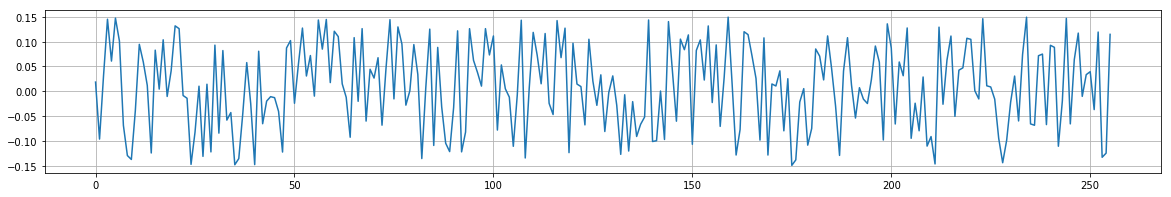

In [17]:
# Make noisy nuetral Priming signal 
myp=np.zeros([1,seqLen,len(params['props'])+1])
# !! PRIMING DOES MATTER - has to be a certain level of noise
myp[0,:,0]=.3*np.random.ranf([seqLen])-.15 #signal
myp[0,:,1]= .45+.1*np.random.ranf([seqLen])     #instrument
myp[0,:,2]= .5*np.random.ranf([seqLen])    #pressure1
#myp[0,:,3]=1-myp[0,:,2]    #pressure2
myp[0,:,3]= np.random.ranf([seqLen])    #pitch
myp[0,:,4]= np.random.ranf([seqLen])    #tongue
myprimer=torch.tensor(myp, dtype=torch.float)

plt.figure(figsize=(20,3))
plt.plot(np.arange(len(myp[0,:,0])), myp[0,:,0])
plt.grid()
plt.show()

### Ramp up and down in both pitch and volume

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f68c81b5208>>
Traceback (most recent call last):
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/lonce/anaconda3/envs/snn/lib/python3.

signal length is 16000
p length is 1


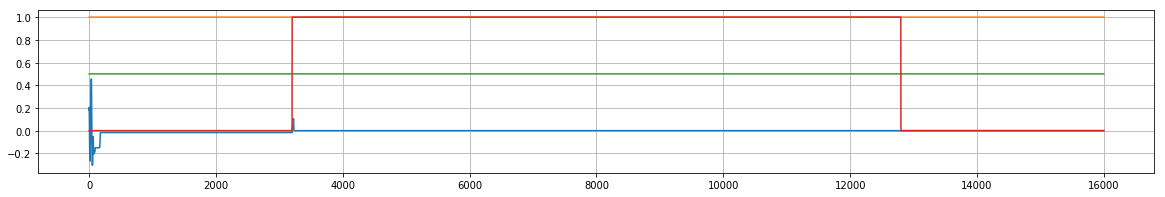

In [18]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(1*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5 #2*(.5-np.abs(.5-t))
    v=1 #np.minimum(1.,3.6*(.5-np.abs(.5-t)))
    
    if (t<0.2) :
        b=0
    elif t<0.8 :
        b=1
    elif t<1 :
        b=0
        
    i=0
    return np.array([i,v,p,b])   

signal = generate(rnn, genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[1:4] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal[seqLen:], rate=sr, autoplay=False))

### Three squarewave pressure params of different stengths

signal length is 32000
p length is 1


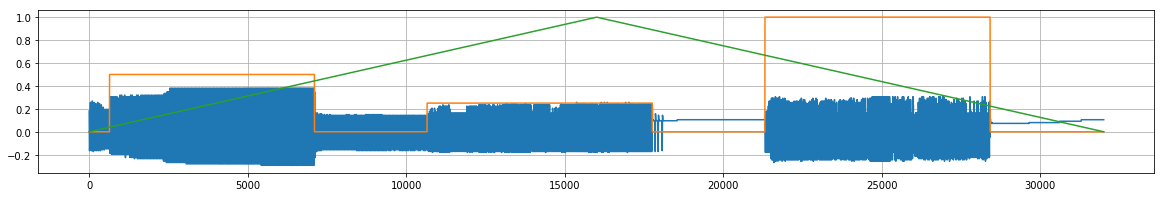

In [20]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(2*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=2*(.5-np.abs(.5-t))
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
    elif t<.222 :
        v=.5
    elif t<.333 :
        v=0
    elif t<.555 :
        v=.25
    elif t<.666 :
        v=0
    elif t<.888 :
        v=1
    else :
        v=0
    i=0
    
    b=1
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p, b]) 


signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[1:3] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f68b62a1a20>>
Traceback (most recent call last):
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/lonce/anaconda3/envs/snn/lib/python3.

signal length is 32000
p length is 1


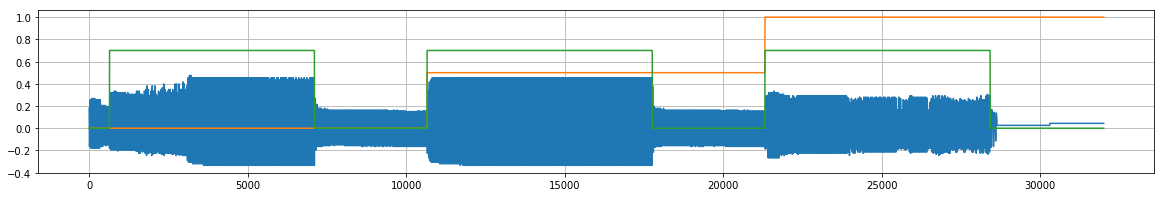

In [21]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(2*sr) #not including priming

def fsweep(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.25
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1

    b=1
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p, b]) 


signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep)
#plot_signal(signal)

p = [fsweep(t) for t in range(genlen)]
q=[x[0:2] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f68c2fd8470>>
Traceback (most recent call last):
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/lonce/anaconda3/envs/snn/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/lonce/anaconda3/envs/snn/lib/python3.

signal length is 16000
p length is 1


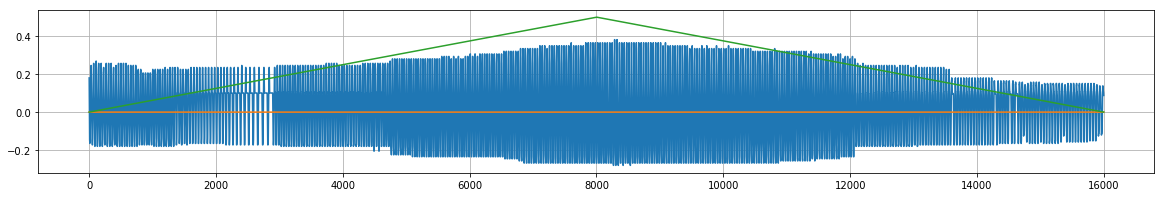

In [22]:
# Generate!
#*************************************
from IPython.display import Audio, display

genlen= int(sr) #not including priming

def fsweep1(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=.5*2*(.5-np.abs(.5-t))
    b=1
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p, b]) 

def fsweep2(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1
    b=1
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p, b]) 

def fsweep3(snum) :   #nsnum is sample number not including priming
    t=snum/genlen #snum/params['sample_rate']
    p=.5
    i=0
    v=0
    #v=.5*2*(.5-np.abs(.5-t))
    if (t<0.02) :
        v=0
        i=0
    elif t<.222 :
        v=.7
        i=0
    elif t<.333 :
        v=0
        i=0
    elif t<.444 :
        v=.7
        i=.5
    elif t<.555 :
        v=.7
        i=.5
    elif t<.666 :
        v=0
        i=.5
    elif t<.777 :
        v=.7
        i=1
    elif t<.888 :
        v=.7
        i=1
    elif t<=1.0 :
        v=0
        i=1

    b=1
    #return np.array([i,v,1-v, p])  #pressure2
    return np.array([i,v, p, b]) 

signal = generate(rnn,genlen, primer=myprimer, paramvect=fsweep1)
#plot_signal(signal)

p = [fsweep1(t) for t in range(genlen)]
q=[x[0:2] for x in p]

print("signal length is {}".format(len(signal[seqLen:])))
print("p length is {}".format(len(p[1:2])))

plt.figure(figsize=(20,3)) 
plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) #just print one example from the batch
#plt.plot(np.arange(len(signal[256:])), p[:,2]) #just print one example from the batch
plt.plot(np.arange(len(q)), q) #just print one example from the batch
plt.grid()
plt.show()

display(Audio(signal, rate=sr, autoplay=False))

In [ ]:
import random
fname = random.choice(datafiles)
fname

### show one of the parameter contours from the original training data

param pressure for fname foo_faustFlute13.21_2019.06.22.wav


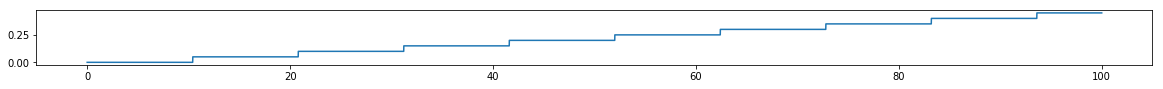

0,        0
-2.0000000000131024e-05,        0
7.999999999963592e-05,        0
0.4799800000000003,        0
0.48008000000000006,        0
0.7999799999999997,        0
0.8000799999999995,        0
1.2799799999999992,        0
1.280079999999999,        0
1.5999799999999995,        0
1.6000799999999993,        0
2.07998,        0
2.0800799999999997,        0
2.3999799999999993,        0
2.400079999999999,        0
2.879979999999999,        0
2.8800799999999986,        0
3.199979999999999,        0
3.200079999999999,        0
3.6799799999999996,        0
3.6800799999999994,        0
3.99998,        0
4.00008,        0
4.47998,        0
4.48008,        0
4.799980000000001,        0
4.80008,        0
5.279980000000001,        0
5.280080000000001,        0
5.5999799999999995,        0
5.600079999999999,        0
6.07998,        0
6.08008,        0
6.39998,        0
6.40008,        0
6.879980000000001,        0
6.88008,        0
7.199980000000001,        0
7.200080000000001,        0
7.67998000

In [24]:
#bookmark
import random

p=params['props'][1] # amplitude or pressure1
fname = random.choice(datafiles)
print("param {} for fname {}".format(p, fname))

duration=100

from paramManager import paramManager
pm=paramManager.paramManager(params['datadir'], params['paramdir'])
fooparams=pm.getParams(params['datadir'] + '/' + fname) #the path and extension are optional
newtime, newvals = pm.resampleParam(fooparams,p,16000*duration,timestart=0,timeend=duration,verbose=False,overwrite=False)

plt.figure(figsize=(20,1)) 
plt.plot(newtime, newvals) #just print one example from the batch
plt.show()
for i in range (len(fooparams[p]['times'])) :
    print("{},        {}".format( fooparams[p]['times'][i], fooparams[p]['values'][i]))

### Show the transition between primer and parameterized signal

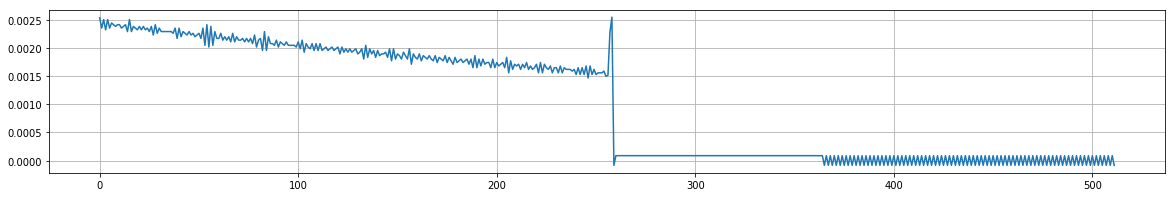

In [26]:
from IPython.display import Audio

# Generate!
#*************************************
#paramvect = torch.from_numpy(np.array([0,1,0.5])).type(torch.cuda.FloatTensor)
#paramvect = np.array([0,1,0,0]) #pressure2
paramvect = np.array([1,1,.5,1]) 
signal = generate(rnn,max_length,paramvect=lambda n: paramvect, primer=None)#myprimer)
plt.figure(figsize=(20,3))
plt.plot(np.arange(len(signal[0:512])), signal[0:512])
plt.grid()
plt.show()

display(Audio(data=signal[0:512],rate=sr))


### Interactive square wave pressure parameter contour

In [27]:
from ipywidgets import interact,interactive
from ipywidgets import FloatSlider

genlen= int(.6*sr) #not including priming

gi=0
gv=0
gp=0


def fsweep(snum) :   #nsnum is sample number not including priming
    
    t=snum/genlen #snum/params['sample_rate']
    if (t<0.1) :
        v=0
    elif t<.7 :
        v=gv
    else :
        v=0
    b=1
    return np.array([gi,v, gp, b]) 


def widgetfunc(x,y,z):
    paramvect = np.array([x,y,z])
    global gi
    global gv
    global gp
    
    gi=x
    gv=y
    gp=z
    
    signal = generate(rnn,genlen,primer=myprimer,paramvect = fsweep)
    
    p = [fsweep(t) for t in range(genlen)]
    q=[x[1:3] for x in p]


    plt.figure(figsize=(20,3))
    #lot_signal(signal[seqLen:max_length])
    plt.plot(np.arange(len(signal[seqLen:])), signal[seqLen:]) 
    
    plt.plot(np.arange(len(q)), q) #just print one example from the batch
    
    plt.grid()
    plt.show()
    display(Audio(data=signal[0:],rate=sr))
    return signal
    
xslider=FloatSlider(min=0, max=1, step=.01, value=1.0, continuous_update=False, description='instID')
yslider=FloatSlider(min=0, max=1, step=.01, value=1.0, continuous_update=False, description='pressure1')
zslider=FloatSlider(min=0, max=1, step=.01, value=0.5,  continuous_update=False, description='midiPitch')

w = interactive(widgetfunc, x=xslider, y=yslider, z=zslider)
display(w)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='instID', max=1.0, step=0.01…